In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Exercise 1 : Understanding The Problem And Data Collectio
--

In [8]:
df_diabetes = pd.read_csv('diabetes_prediction_dataset.csv')

In [9]:
df_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [10]:
df_diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
df_diabetes.describe().round(2)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.08
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


<Axes: >

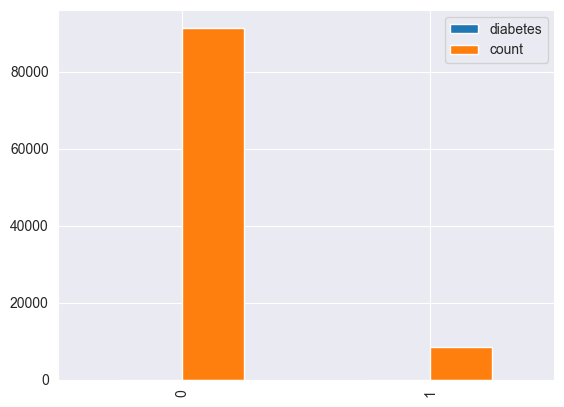

In [12]:
df_diabetes['diabetes'].value_counts().reset_index().plot(kind='bar')

In [13]:
df_diabetes['diabetes'].value_counts().reset_index()

,diabetes,count
0,0,91500
1,1,8500


In [14]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [15]:
from sklearn.model_selection import train_test_split

# Extract features (X) and target variable (y)
X = df_diabetes.drop(columns=['diabetes'])
y = df_diabetes['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (80000, 8) (80000,)
Testing set shape: (20000, 8) (20000,)


For the given problem of predicting diabetes status based on various features such as age, hypertension, BMI, etc., we can use a classification model. Since the target variable (diabetes status) is binary (0 for non-diabetic, 1 for diabetic), binary classification models are suitable for this problem.

One commonly used binary classification model is Logistic Regression. Logistic Regression is well-suited for binary classification tasks, and it provides probabilities of class membership, making it interpretable and easy to implement. Additionally, it works well with both linear and non-linear relationships between features and the target variable.

As for standardizing the data, it's generally a good practice to standardize the features, especially when using models that are sensitive to the scale of features, such as Logistic Regression. Standardizing the data ensures that all features have a mean of 0 and a standard deviation of 1, which helps the model converge faster and makes the coefficients more interpretable.

In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()
numeric_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_features = ['gender', 'smoking_history']
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train[numeric_features])

# Transform the testing data
X_test_scaled = scaler.transform(X_test[numeric_features])


In [17]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression model
log_reg = LogisticRegression()

# Fit the model on preprocessed training data
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

Accuracy: 0.95875


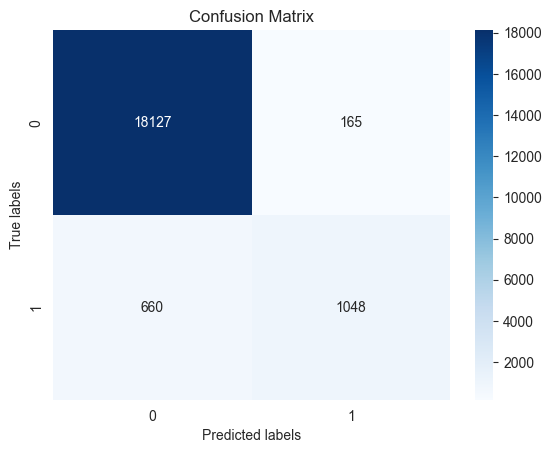

Precision: 0.8639736191261336
Recall: 0.6135831381733021
F1-score: 0.7175624786032181


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test data
y_pred = log_reg.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


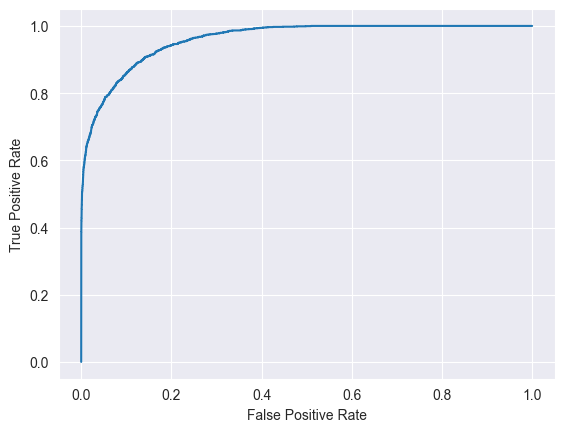

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
#define metrics
y_pred_proba = log_reg.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()